In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('dark')

import os
import datetime

import cv2

In [2]:
#region functions
def rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def bgr(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def disp(img, title='', s=8, vmin=None, vmax=None):
    plt.figure(figsize=(s,s))
    plt.axis('off')
    if vmin is not None and vmax is not None:
        plt.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

def uint8ify(img):
    img -= img.min()
    img /= img.max()
    img *= 255
    return np.uint8(img)

def overlay(a,b):
    # a and b should be float images and between 0-1

    mask = a >= 0.5 # generate boolean mask of everywhere a > 0.5 
    ab = np.zeros_like(a) # generate an output container for the blended image 

    # now do the blending 
    ab[~mask] = (2*a*b)[~mask] # 2ab everywhere a<0.5
    ab[mask] = (1-2*(1-a)*(1-b))[mask] # else this
    
    return ab

def before_after(img_a, img_b, name='', vmin=None, vmax=None, effect_name='Processed'):
    fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(10,4))
    axs[0].axis('off')
    axs[1].axis('off')
    axs[0].set_title(f'{name} Original')
    axs[1].set_title(f'{name} {effect_name}')
    if vmin is not None and vmax is not None:
        axs[0].imshow(img_a, cmap='gray', vmin=vmin, vmax=vmax)
        axs[1].imshow(img_b, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        axs[0].imshow(img_a, cmap='gray')
        axs[1].imshow(img_b, cmap='gray')
    plt.show()
#endregion

In [25]:
def draw_roi(img, roi_rect, debug=True):
    cy, cx, h, w = roi_rect
    COLOR = (255, 0, 0)
    THICKNESS = 6
    img_drawn = cv2.rectangle(img.copy(), (cx-w//2, cy-h//2), (cx+w//2, cy+h//2), COLOR, THICKNESS)

    if debug:
        disp(img_drawn)

    return img_drawn

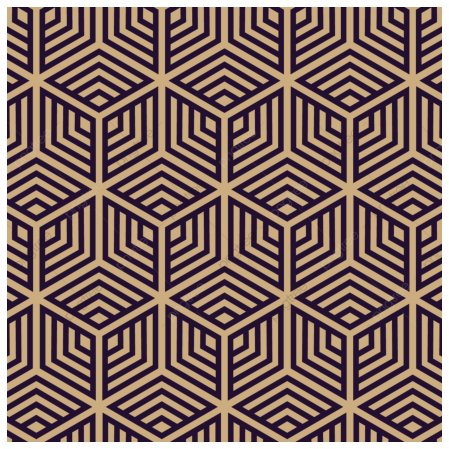

In [36]:
img = rgb(cv2.imread('hex.jpg'))
disp(img, s=8)

In [47]:
# ROI (Center_y, Center_x, heigth, width)
roi_height, roi_width = 150, 150
roi_rect = (img.shape[0]//2, img.shape[1]//2, roi_height, roi_width)

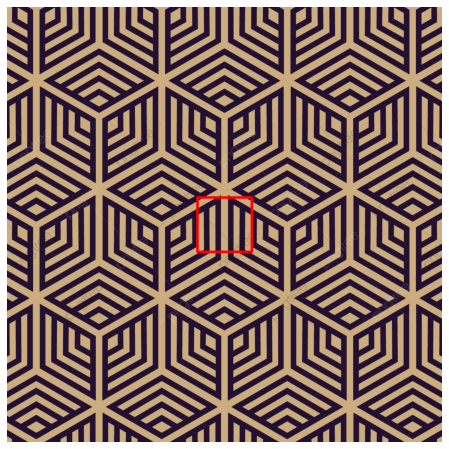

In [50]:
draw_roi(img, roi_rect);

In [83]:
def make_tile(img, roi_rect, tile_multiple=(4,4), debug=True):
    cy, cx, h, w = roi_rect
    roi = img[cy-h//2:cy+h//2, cx-w//2:cx+w//2, :]

    # Tile the roi
    img_tiled = np.tile(roi, (*tile_multiple,1))
    img_tiled = img_tiled.astype(np.float32)
    img_tiled[:h, :w, :] *= 0.65
    img_tiled = img_tiled.astype(np.uint8)

    if debug:
        disp(img_tiled)
    
    return roi

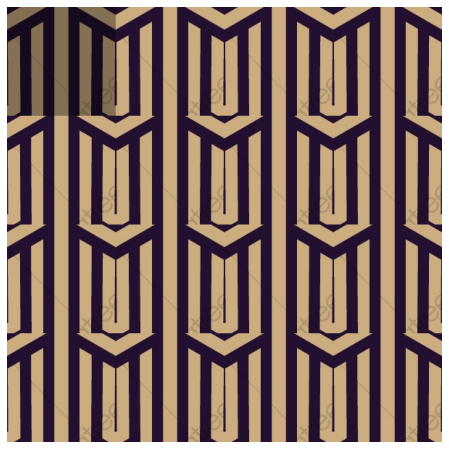

In [84]:
tileable_img = make_tile(img, roi_rect)

In [ ]:
print("hi")